In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [ ]:
(x_train,y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
print(x_train.shape)

(50000, 32, 32, 3)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


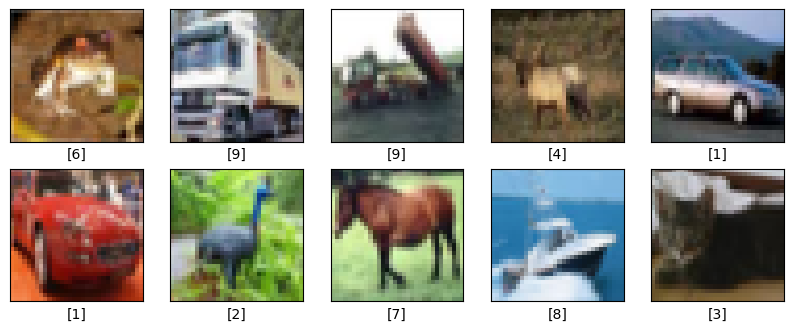

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap= plt.cm.binary)
  plt.xlabel(y_train[i])

In [ ]:
from keras import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.add(keras.layers.Flatten(input_shape=(32,32,3)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(150, activation= "relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 968560 (3.69 MB)
Trainable params: 968560 (3.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
opt = keras.optimizers.Adam(learning_rate= 0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metrics = ['accuracy']

In [ ]:
model.compile(optimizer=opt, loss=loss, metrics= metrics)

In [ ]:
history = model.fit(x_train, y_train, epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 24s 15ms/step - loss: 2.2137 - accuracy: 0.2180 - val_loss: 2.0460 - val_accuracy: 0.2442
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.9306 - accuracy: 0.2718 - val_loss: 1.9339 - val_accuracy: 0.2724
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.9229 - accuracy: 0.2715 - val_loss: 1.9285 - val_accuracy: 0.2831
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.9121 - accuracy: 0.2779 - val_loss: 1.9067 - val_accuracy: 0.2773
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.9060 - accuracy: 0.2789 - val_loss: 1.9631 - val_accuracy: 0.2681
Epoch 6/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.9059 - accuracy: 0.2772 - val_loss: 1.9350 - val_accuracy: 0.2709
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.9136 - accuracy: 0.2726 - val_loss: 1.9057 -

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)

313/313 [==============================] - 1s 4ms/step


In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_classes)

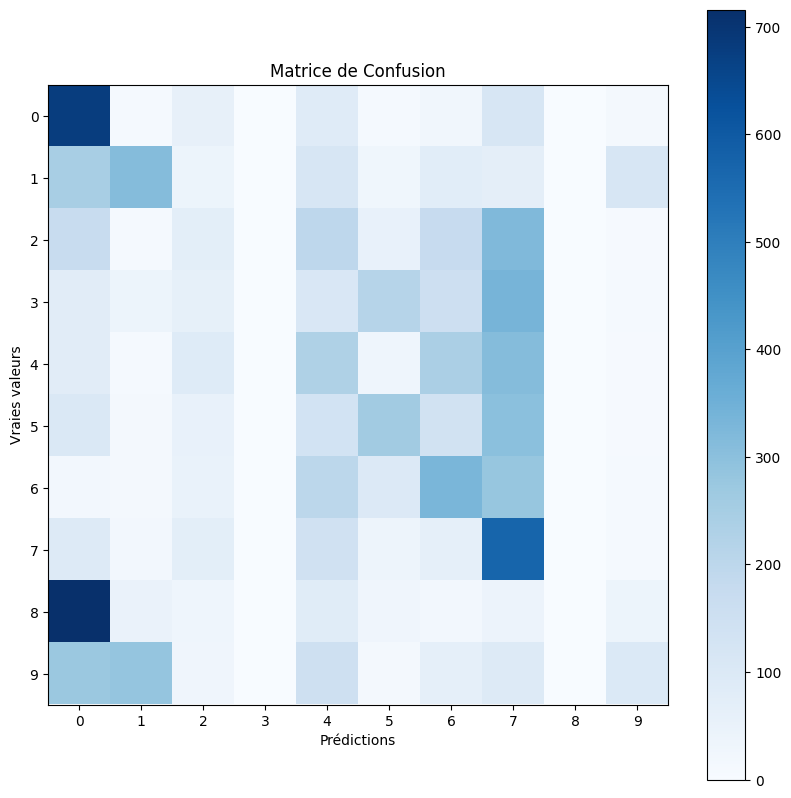

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.colorbar()
plt.xticks(np.arange(10), range(10))
plt.yticks(np.arange(10), range(10))
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()